In [ ]:
!ls data

# Chapter 6 Linear Model Selection and Regularization 
Linear models still can do astonishingly well compared to non-linear models. This chapter will explore other types of fitting besides least squares because they can give better prediction accuracy and interpretability.

## Classes of alternatives to least squares
* Subset Selection - Choose a subset of the predictors 
* Shrinkage (regularization)收缩（正则化） - Fit all predictors but limit their size. Coefficients can go to 0.
* Dimension Reduction（降维） - project the predictors into a smaller subspace 
## Best Subset Selection
Fit all possible models $2^p$ and take the best model using cross-validated
prediction error, Cp, AIC, BIC, or adjusted $R^2$. This can be impossible with large enough p


## Stepwise Selection - Forward, Backward and both向前向后
Because of computational limitation a simpler method of adding or subtracting the best predictor to the current model is employed.

### Forward Selection
Start with an empty model and choose on predictor to add to the model based on best adjusted $R^2$ or other similar metric. Continue adding variables until no improvement in adjusted $R^2$. 

A variation to this is to retain each model at each step and use $R^2$ (not adjusted) as the metric. This will build p models. Then use cross validation with $R^2$ to pick the best model of those p models built from forward selection.

### Backward Selection
Similar to forward selection but start with all predictors in model and remove one at a time until adjusted $R^2$ is maximized or alternatively, find p models with $R^2$ and then use cross validation to pick best of the p models.

## Both
At each step, consider both adding or subtracting a variable in the model.


#### Example: Best subset
Here we apply the best subset selection approach to the Hitters data. We
wish to predict a baseball player’s Salary on the basis of various statistics
associated with performance in the previous year. 

$y = \beta_0$ find the $R_{adj}=0.2$. 


$y = \beta_0 + \beta_1 x_1$ $R_{adj}=0.2$

$y = \beta_0 + \beta_1 x_2$ $R_{adj}=0.4$

$y = \beta_0 + \beta_1 x_2 + \beta_2 x_1$ $R_{adj}=0.4$

$y = \beta_0 + \beta_1 x_2 + \beta_2 x_3$ $R_{adj}=0.6$

$\vdots$

$y = \beta_0 + \beta_1 x_2 + \beta_2 x_3 + \beta_3 x_5$ $R_{adj}=0.8$

### backward
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_5 x_5$ $R_{adj}=0.8$

$y = \beta_0 +  \beta_2 x_2 + \cdots + \beta_5 x_5$ $R_{adj}=0.85$




## F/B selection
$y = \beta_0 $ $R_{adj}=0.2$

$\vdots$

$y = \beta_0 + \beta_1 x_2 + \beta_2 x_3 + \beta_3 x_5$ $R_{adj}=0.8$

$\vdots$

$y = \beta_0 + \beta_1 x_2 + \beta_3 x_5$ $R_{adj}=0.85$

In [ ]:
2**10

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
hitters_df = pd.read_csv('D:/ukm.ppt/机器学习/week2/data/hitters.csv')
hitters_df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,#NAME?,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,#NAME?,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,#NAME?,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,#NAME?,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,#NAME?,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


First of all, we note that the `Salary` variable is missing for some of the
players. The `isnull()` function can be used to identify the missing observations. It returns a vector of the same length as the input vector, with a `TRUE` value
for any elements that are missing, and a `FALSE` value for non-missing elements.
The `sum()` function can then be used to count all of the missing elements:

In [3]:
print("Number of null values:", hitters_df["Salary"].isnull().sum())

Number of null values: 59


In [7]:
# Print the dimensions of the original Hitters data (322 rows x 20 columns)
print("Dimensions of original data:", hitters_df.shape)

# Drop any rows the contain missing values, along with the player names
hitters_df_clean = hitters_df.dropna().drop('Unnamed: 0', axis=1)

# Print the dimensions of the modified Hitters data (263 rows x 20 columns)
print("Dimensions of modified data:", hitters_df_clean.shape)

# One last check: should return 0
print("Number of null values:", hitters_df_clean["Salary"].isnull().sum())

Dimensions of original data: (322, 21)
Dimensions of modified data: (263, 20)
Number of null values: 0


In [8]:
dummies = pd.get_dummies(hitters_df_clean[['League', 'Division', 'NewLeague']])
# get_dummies() 函数来将分类变量转换为哑变量（也称为虚拟变量）
# 将每个分类列中的每个唯一值转换成一个新的二进制（0或1）列

y = hitters_df_clean.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = hitters_df_clean.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
# 用于合并两个或多个 pandas 对象
# axis=1 表示沿着列的方向进行合并

In [8]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,True,True,True
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,False,True,False
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,True,False,True
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,True,False,True
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,False,True,False


We can perform best subset selection by identifying the best model that contains a given number of predictors, where **best** is quantified using RSS. We'll define a helper function to outputs the best set of variables for
each model size

In [3]:
# 在特定的特征子集上拟合一个普通最小二乘回归（OLS）模型，并计算该模型的残差平方和（RSS）。
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSSy,X[list(feature_set)].astype(float)
    model = sm.OLS() #普通最小二乘回归模型
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum() ##RSS残差平方和，值越小表明拟合度好
    return {"model":regr, "RSS":RSS}



In [10]:
def getBest(k):
    
    tic = time.time() #计算整个过程的运行时间。
    
    results = [] #初始化空列表，储存每个模型的评估结果
    
    for combo in itertools.combinations(X.columns, k):
        #itertools.combinations 生成所有可能的 k 个特征的组合。X.columns 提供了数据集中所有可能的特征。

        results.append(processSubset(combo)) 
        # 对于每一个特征组合，调用之前定义的 processSubset 函数来评估该组合的模型，并将结果追加到 results 列表中。
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()] 
    # .loc可以使用列名或行标签来选取数据。
    # models['RSS'].argmin() 找到具有最小 RSS 值的模型的索引，并选择该模型。
    
    toc = time.time() #记录处理结束时的时间
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

This returns a `DataFrame` containing the best model that we generated, along with some extra information about the model. Now we want to call that function for each number of predictors $k$:

In [11]:
# Could take quite awhile to complete...

models_best = pd.DataFrame(columns=["RSS", "model"])#初始化空的数据框

tic = time.time()
for i in range(1,8):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 19 models on 1 predictors in 1.3581063747406006 seconds.
Processed 171 models on 2 predictors in 0.44301629066467285 seconds.
Processed 969 models on 3 predictors in 3.2073752880096436 seconds.
Processed 3876 models on 4 predictors in 13.39865231513977 seconds.
Processed 11628 models on 5 predictors in 40.26049780845642 seconds.
Processed 27132 models on 6 predictors in 97.21539735794067 seconds.
Processed 50388 models on 7 predictors in 188.16122722625732 seconds.
Total elapsed time: 345.3284287452698 seconds.


Now we have one big DataFrame that contains the best models we've generated along with their RSS:

In [13]:
models_best

,RSS,model
1,43213925.909868,<statsmodels.regression.linear_model.Regressio...
2,30733054.433644,<statsmodels.regression.linear_model.Regressio...
3,29410713.176731,<statsmodels.regression.linear_model.Regressio...
4,27976782.522603,<statsmodels.regression.linear_model.Regressio...
5,27187795.009508,<statsmodels.regression.linear_model.Regressio...
6,26397720.512772,<statsmodels.regression.linear_model.Regressio...
7,26064130.610341,<statsmodels.regression.linear_model.Regressio...


If we want to access the details of each model, no problem! We can get a full rundown of a single model using the `summary()` function:

In [15]:
print(models_best.loc[7, "model"].summary())
# R²值越接近1，表示模型解释的变异越多，拟合效果越好。
# 均方误差（MSE）：均方误差是RSS除以数据点数量（n）

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              144.2
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    4.76e-85
Time:                        11:36:58   Log-Likelihood:                         -1885.9
No. Observations:                 263   AIC:                                      3786.
Df Residuals:                     256   BIC:                                      3811.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This output indicates that the best two-variable model contains only Hits and CRBI. To save time, we only generated results up to the best 7-variable model. You can use the functions we defined above to explore as many variables as are desired.

In [16]:
# Show the best 19-variable model (there's actually only one)
print(getBest(17)["model"].summary())

Processed 171 models on 17 predictors in 0.9145097732543945 seconds.
                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              61.54
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    2.25e-78
Time:                        11:37:07   Log-Likelihood:                         -1878.0
No. Observations:                 263   AIC:                                      3790.
Df Residuals:                     246   BIC:                                      3851.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>

Rather than letting the results of our call to the `summary()` function print to the screen, we can access just the parts we need using the model's attributes. For example, if we want the $R^2$ value:

In [17]:
models_best.loc[2, "model"].rsquared
# 行标签 2 表示第二行
# 列标签 "model" 指的是存储模型对象的列
# R-squared（决定系数）是一个介于0和1之间的数值，用于衡量模型解释的变异性的比例。值越接近1，表示模型解释的变异性越大，模型的拟合度越好。

0.7614950002332872

In addition to the verbose output we get when we print the summary to the screen, fitting the `OLM` also produced many other useful statistics such as adjusted $R^2$, AIC, and BIC. We can examine these to try to select the best overall model. Let's start by looking at $R^2$ across all our models:

In [18]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)
# lambda row: row[1].rsquared，它定义了一个匿名函数，此函数接受一个参数 row（代表数据框的一行），
# 并返回该行第二个元素（假设模型对象位于每行的第二个位置）的 R-squared 值。
#.apply应用函数
#row[1] 表示取每一行的第二列

1    0.664637
2    0.761495
3    0.771757
4    0.782885
5    0.789008
6    0.795140
7    0.797728
dtype: float64

As expected, the $R^2$ statistic increases monotonically as more
variables are included.

Plotting RSS, adjusted $R^2$, AIC, and BIC for all of the models at once will
help us decide which model to select. Note the `type="l"` option tells `R` to
connect the plotted points with lines:

Text(0, 0.5, 'BIC')

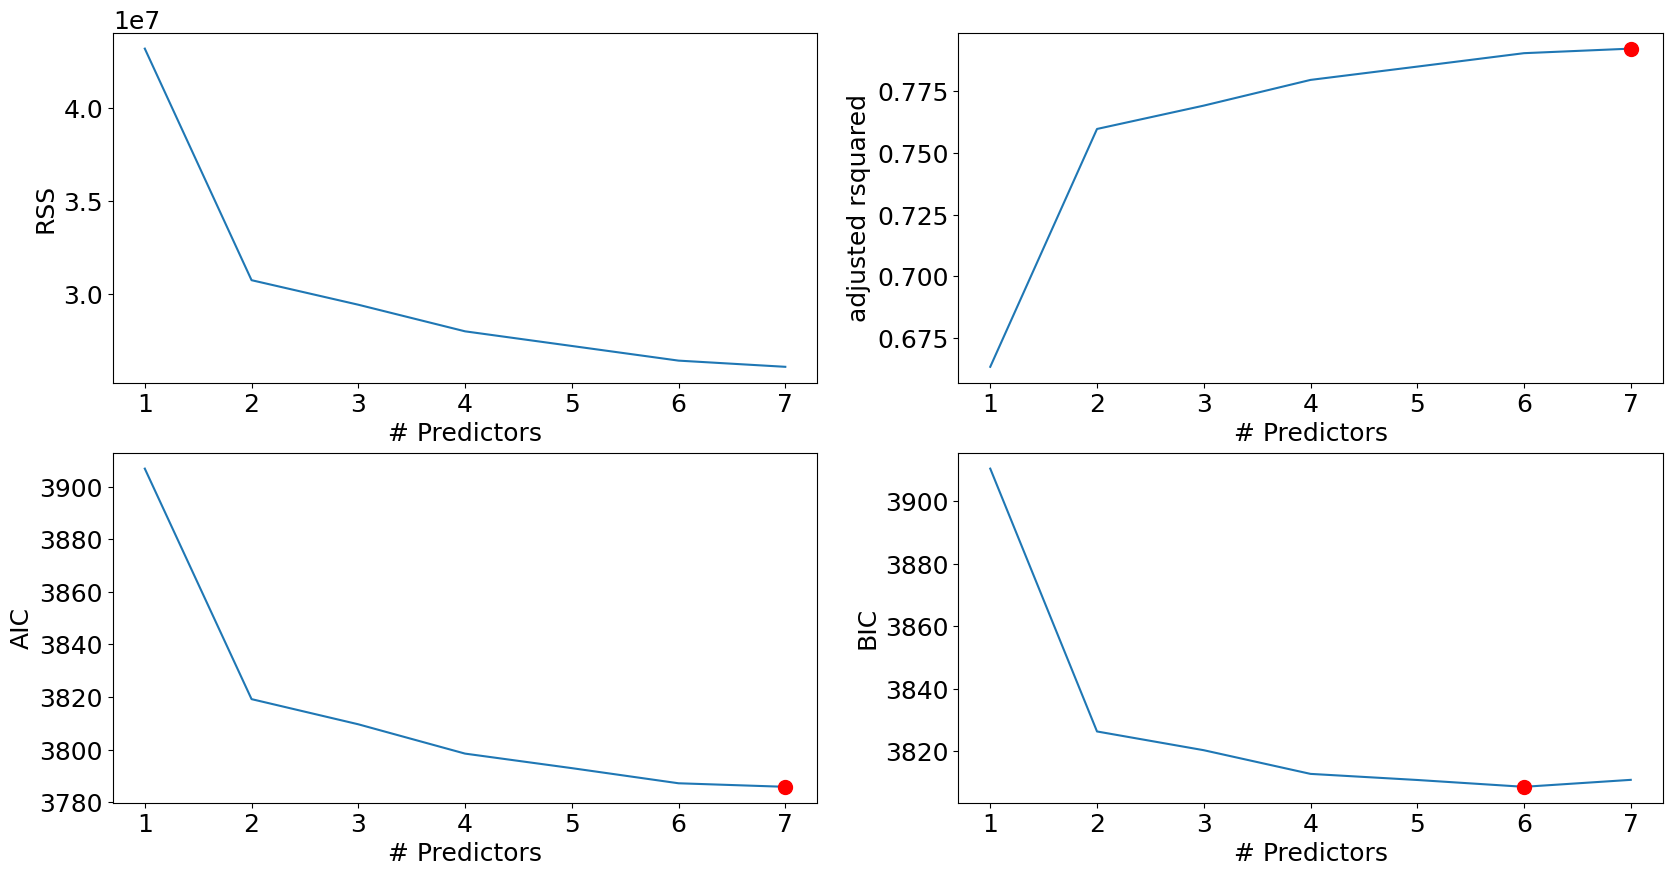

In [19]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax()+1, rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin()+1, aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC') # 赤池信息量准则，AIC 旨在衡量模型的复杂性（参数数量）与模型拟合数据的好坏之间的平衡。
# 倾向于选择具有最小AIC值的模型。

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin()+1, bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC') # 贝叶斯信息准则，通常选择BIC值最小的模型。

In [20]:
rsquared_adj.argmax()
# .argmax() 方法返回数组（或 Series）中最大元素的索引。

6

In [21]:
rsquared_adj.max()
# .max() 方法返回数组（或 Series）中的最大值。

0.792197490075703

Recall that in the second step of our selection process, we narrowed the field down to just one model on any $k<=p$ predictors. We see that according to BIC, the best performer is the model with 6 variables. According to AIC and adjusted $R^2$ something a bit more complex might be better. Again, no one measure is going to give us an entirely accurate picture... but they all agree that a model with 5 or fewer predictors is insufficient.

#### Example: Forward Selection

In [4]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors] #提取剩余的预测变量
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
        #每个剩余的预测变量 p，将其添加到当前的 predictors 列表中
        #processSubset 函数来评估这个新的变量组合
        #将每个模型的结果添加到 results 列表
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()] #找到具有最小残差平方和（RSS）的模型
    #argmin() 方法来找到 RSS 最小值的索引
    #loc 方法获取对应的行，即最佳模型
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [9]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors) #返回包含最佳模型和相应 RSS 的 DataFrame 行。
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  19 models on 1 predictors in 1.3028783798217773 seconds.
Processed  18 models on 2 predictors in 0.08209514617919922 seconds.
Processed  17 models on 3 predictors in 0.045914649963378906 seconds.
Processed  16 models on 4 predictors in 0.04397869110107422 seconds.
Processed  15 models on 5 predictors in 0.048688411712646484 seconds.
Processed  14 models on 6 predictors in 0.0635523796081543 seconds.
Processed  13 models on 7 predictors in 0.039947509765625 seconds.
Processed  12 models on 8 predictors in 0.04391336441040039 seconds.
Processed  11 models on 9 predictors in 0.035917043685913086 seconds.
Processed  10 models on 10 predictors in 0.037656307220458984 seconds.
Processed  9 models on 11 predictors in 0.03780007362365723 seconds.
Processed  8 models on 12 predictors in 0.03029179573059082 seconds.
Processed  7 models on 13 predictors in 0.023932456970214844 seconds.
Processed  6 models on 14 predictors in 0.02481245994567871 seconds.
Processed  5 models on 15 predic

In [21]:
print(models_fwd.loc[17, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              61.54
Date:                Sun, 05 May 2024   Prob (F-statistic):                    2.25e-78
Time:                        10:48:34   Log-Likelihood:                         -1878.0
No. Observations:                 263   AIC:                                      3790.
Df Residuals:                     246   BIC:                                      3851.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
print(models_fwd['RSS'].dtype)

object


In [25]:
models_fwd['RSS'] = models_fwd['RSS'].astype(float)

In [26]:
best_model_index = models_fwd['RSS'].idxmin()
best_model = models_fwd.loc[best_model_index, 'model']

# 打印最佳模型索引和摘要
print("最佳模型索引为:", best_model_index)
print(best_model.summary())

最佳模型索引为: 19
                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              54.64
Date:                Sun, 05 May 2024   Prob (F-statistic):                    1.31e-76
Time:                        10:53:19   Log-Likelihood:                         -1877.9
No. Observations:                 263   AIC:                                      3794.
Df Residuals:                     244   BIC:                                      3862.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [24]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.665
Model:                            OLS   Adj. R-squared (uncentered):              0.663
Method:                 Least Squares   F-statistic:                              519.2
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    4.20e-64
Time:                        11:51:33   Log-Likelihood:                         -1952.4
No. Observations:                 263   AIC:                                      3907.
Df Residuals:                     262   BIC:                                      3910.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We see that using forward stepwise selection, the best one-variable
model contains only `Hits`, and the best two-variable model additionally
includes `CRBI`. Let's see how the models stack up against best subset selection:

In [25]:
print(models_best.loc[6, "model"].summary())
print(models_fwd.loc[6, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              166.3
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    1.79e-85
Time:                        11:51:37   Log-Likelihood:                         -1887.6
No. Observations:                 263   AIC:                                      3787.
Df Residuals:                     257   BIC:                                      3809.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Example: Backward Selection 

In [27]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1): 
        #itertools.combinations 生成当前预测变量集 
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [28]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time", (toc-tic), "seconds.")

Processed  19 models on 18 predictors in 0.09292364120483398 seconds.
Processed  18 models on 17 predictors in 0.07295346260070801 seconds.
Processed  17 models on 16 predictors in 0.059952735900878906 seconds.
Processed  16 models on 15 predictors in 0.06388401985168457 seconds.
Processed  15 models on 14 predictors in 0.06163430213928223 seconds.
Processed  14 models on 13 predictors in 0.0544283390045166 seconds.
Processed  13 models on 12 predictors in 0.05991721153259277 seconds.
Processed  12 models on 11 predictors in 0.059442758560180664 seconds.
Processed  11 models on 10 predictors in 0.03812003135681152 seconds.
Processed  10 models on 9 predictors in 0.05276632308959961 seconds.
Processed  9 models on 8 predictors in 0.03131556510925293 seconds.
Processed  8 models on 7 predictors in 0.027031898498535156 seconds.
Processed  7 models on 6 predictors in 0.02465534210205078 seconds.
Processed  6 models on 5 predictors in 0.02219390869140625 seconds.
Processed  5 models on 4 pr

In [28]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[7, "model"].params)

------------
Best Subset:
------------
Hits            1.680029
Walks           3.399961
CAtBat         -0.328835
CHits           1.347017
CHmRun          1.349373
PutOuts         0.248166
Division_W   -111.943760
dtype: float64


In [29]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[7, "model"].params)

-----------------
Foward Selection:
-----------------
Hits            7.277149
CRBI            0.652415
Division_W   -110.656338
PutOuts         0.259787
AtBat          -1.644651
Walks           3.684324
League_N       49.978410
dtype: float64


In [30]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[7, "model"].params)

-------------------
Backward Selection:
-------------------
AtBat         -1.601655
Hits           6.148449
Walks          5.866033
CRuns          1.097453
CWalks        -0.650614
PutOuts        0.310125
Division_W   -95.027171
dtype: float64


# Choosing Optimal Model 
## Adjusting Training Statistics or Using Cross Validation 
As learned in Chapter 5, cross validation is an extremely good tool at giving us insight to how well the model will be used on unseen data (test data).

But alternatively to cross validation, we can punish the training error statistics so in theory they can give us insight on what the test error will be. There have been several statistics developed to give us insight as to what the model will do for unseen errors.

The 4 most popular are AIC, BIC, Mallows Cp and Adjusted R^2. AIC, BIC and Cp all have similar formulas that inflate the error for more predictors and a higher estimated variance. Adjusted R squared lowers the R^2 by each additional predictor in the model. All 4 of these statistics are 'classical' model selectors and were commonly used.

Cross validation can be computationally intense but with modern computation we can build lots of models and evaluate them easily.

#### Example: Model selection using the Validation Set Approach

In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [48]:
df = pd.read_csv('D:/ukm.ppt/机器学习/week2/data/hitters.csv')

# Drop any rows the contain missing values, along with the player names
df = df.dropna().drop('Unnamed: 0', axis=1)

# Get dummy variables
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']]).astype(int)
#每个分类列中的每个唯一值转换成一个新的二进制（0或1）列

# Extract independent variable
y = pd.DataFrame(df.Salary)

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [39]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


+ In order for the validation set approach to yield accurate estimates of the test error, we must use only the training observations to perform all aspects of model-fitting — including variable selection. 
+ Therefore, the determination of which model of a given size is best must be made using only the training observations. 
+ This point is subtle but important. If the full data set is used to perform the best subset selection step, the validation set errors and cross-validation errors that we obtain will not be accurate estimates of the test error.

+ In order to use the validation set approach, we begin by splitting the observations into a training set and a test set. 
+ We do this by creating a random vector, train, of elements equal to TRUE if the corresponding observation is in the training set, and FALSE otherwise. 
+ The vector test is TRUE if the observation is in the test set, and a FALSE otherwise. 
+ Note the np.invert() in the command to create test causes TRUEs to be switched to FALSEs and vice versa.
+ We also set a random seed so that the user will obtain the same training set/test set split.

In [40]:
np.random.seed(seed=12)
train = np.random.choice([True, False], size = len(y), replace = True)
#从给定的数组 [True, False] 中随机选取元素，构造一个新的数组
test = np.invert(train)
#对 train 数组中的布尔值进行逻辑非操作，即将 True 转换为 False，将 False 转换为 True

In [38]:
test.shape

(263,)

+ We'll define our helper function to outputs the best set of variables for each model size like we did previously. 
+ Note that we'll need to modify this to take in both test and training sets, because we want the returned error to be the test error:

In [41]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum() #计算残差平方和
    return {"model":regr, "RSS":RSS}

And our function to perform forward selection:

In [42]:
def forward(predictors, X_train, y_train, X_test, y_test):
    
    results = []

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    #所有变量中筛选出还未被选入模型的变量
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    #argmin() 函数用于获取 RSS 最小值的索引
    #loc 根据这个索引选择对应的行，即最佳模型。
        
    # Return the best model, along with some other useful information about the model
    return best_model

Now, we'll call our `forward()` function on the training set in order to perform forward selection for all model sizes:

In [51]:
models_train = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,len(X.columns)+1):    #使用训练数据构建模型 ，在测试数据验证模型
    models_train.loc[i] = forward(predictors, X[train], y[train]["Salary"], X[test], y[test]["Salary"])
    predictors = models_train.loc[i]["model"].model.exog_names

Now let's plot the errors, and find the model that minimizes it:

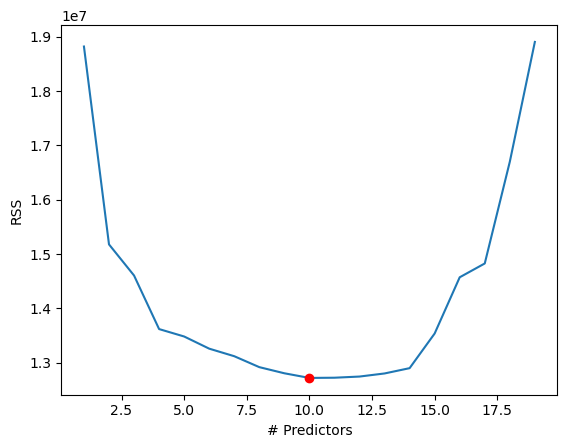

In [52]:
plt.plot(models_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(pd.to_numeric(models_train["RSS"]).argmin()+1, models_train["RSS"].min(), "or")

+ We find that the best model (according to the validation set approach) is the one that contains 10 predictors.

+ Now that we know what we're looking for, let's perform best subset selection on the full dataset and select the best 10-predictor model. 
+ It is important that we make use of the *full data set* in order to obtain more accurate coefficient estimates. 
+ We perform this selection on the *full data set* and select the best 10-predictor model, rather than simply using the predictors that we obtained from the training set, because the best 10-predictor model on the full data set may differ from the corresponding model on the training set.

In [53]:
models_test = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,11):  # 测试数据来训练和测试模型   
    models_test.loc[i] = forward(predictors, X[test], y[test]["Salary"], X[test], y[test]["Salary"])
    predictors = models_test.loc[i]["model"].model.exog_names

In [54]:
models_trainonly = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,11):  # 训练数据来训练和测试模型  
    models_trainonly.loc[i] = forward(predictors, X[train], y[train]["Salary"], X[train], y[train]["Salary"])
    predictors = models_train.loc[i]["model"].model.exog_names

In fact, we see that the best ten-variable model on the full data set has a different set of predictors than the best ten-variable model on the training set:

In [55]:
print(models_train.loc[10, "model"].model.exog_names)
print(models_test.loc[10, "model"].model.exog_names)
print(models_trainonly.loc[10, "model"].model.exog_names)

['Walks', 'CRBI', 'Hits', 'Division_W', 'CWalks', 'CRuns', 'AtBat', 'League_N', 'CHits', 'Runs']
['Walks', 'CRBI', 'Assists', 'Division_W', 'CWalks', 'CRuns', 'PutOuts', 'Errors', 'League_N', 'CHmRun']
['Walks', 'CRBI', 'Hits', 'Division_W', 'CWalks', 'CRuns', 'AtBat', 'League_N', 'CHits', 'CAtBat']


#### Example: Model selection using Cross-Validation
+ Now let's try to choose among the models of different sizes using cross-validation.
+ This approach is somewhat involved, as we must perform forward selection within each of the $k$ training sets. 
+ Despite this, we see that with its clever subsetting syntax, `python` makes this job quite easy. 
+ First, we create a vector that assigns each observation to one of $k = 10$ folds, and we create a DataFrame in which we will store the results:

In [56]:
k = 10        # number of folds
np.random.seed(seed=1)
folds = np.random.choice(k, size = len(y), replace = True)
# np.random.choice 函数从 0 到 k-1 的数字中随机选择
# size=len(y) 确保为数据集中的每个观测分配一个折叠编号，replace=True 表示允许重复选择

# Create a DataFrame to store the results of our upcoming calculations
cv_errors = pd.DataFrame(columns=range(1,k+1), index=range(1,20)) #存储计算出的交叉验证误差
cv_errors = cv_errors.fillna(0) #将所有的空值填充为 0。

+ Now let's write a for loop that performs cross-validation.
+ In the $j^{th}$ fold, the elements of folds that equal $j$ are in the test set, and the remainder are in the training set.
+ We make our predictions for each model size, compute the test errors on the appropriate subset, and store them in the appropriate slot in the matrix `cv.errors`.

In [ ]:
### 交叉验证的逐步前向选择
models_cv = pd.DataFrame(columns=["RSS", "model"])
    
# Outer loop iterates over all folds
for j in range(1,k+1):

    # Reset predictors
    predictors = []
    
    # Inner loop iterates over each size i
    for i in range(1,len(X.columns)+1):    
    
        # The perform forward selection on the full dataset minus the jth fold, test on jth fold
        models_cv.loc[i] = forward(predictors, X[folds != (j-1)], y[folds != (j-1)]["Salary"], X[folds == (j-1)], y[folds == (j-1)]["Salary"])
        
        # Save the cross-validated error for this fold
        cv_errors[j][i] = models_cv.loc[i]["RSS"]

        # Extract the predictors
        predictors = models_cv.loc[i]["model"].model.exog_names
        

In [58]:
cv_errors

,1,2,3,4,5,6,7,8,9,10
1,3.107901e+06,3.212305e+06,4.840104e+06,2.475454e+06,3.750303e+06,1.551977e+06,1.827367e+06,9.115194e+06,1.370720e+06,2.204863e+06
2,2.354036e+06,2.247881e+06,3.414444e+06,1.642456e+06,3.160951e+06,1.250565e+06,1.567470e+06,8.520751e+06,1.081053e+06,1.856305e+06
3,2.148733e+06,2.012864e+06,3.009436e+06,1.566582e+06,2.775618e+06,9.073041e+05,1.260460e+06,8.456577e+06,9.697846e+05,1.674333e+06
4,1.946031e+06,1.870511e+06,2.630784e+06,1.521526e+06,2.618751e+06,8.051359e+05,1.143883e+06,8.331747e+06,8.575537e+05,1.618265e+06
5,1.850398e+06,1.605149e+06,2.537691e+06,1.502728e+06,2.608466e+06,7.761712e+05,1.124175e+06,8.221957e+06,7.939196e+05,1.574253e+06
6,1.778324e+06,1.574266e+06,2.498621e+06,1.482576e+06,2.632055e+06,7.761634e+05,1.115742e+06,8.196970e+06,7.812360e+05,1.534220e+06
7,1.761112e+06,1.524414e+06,2.452303e+06,1.480345e+06,2.661105e+06,7.797162e+05,1.104388e+06,8.171960e+06,7.764572e+05,1.503831e+06
8,1.733231e+06,1.529626e+06,2.418944e+06,1.477510e+06,2.660654e+06,8.038592e+05,1.100754e+06,7.449396e+06,7.745898e+05,1.536790e+06
9,1.773705e+06,1.607920e+06,2.381843e+06,1.504520e+06,2.677002e+06,8.216293e+05,1.096926e+06,7.136283e+06,7.746164e+05,1.542746e+06
10,1.865910e+06,1.682294e+06,2.378624e+06,1.528102e+06,2.597882e+06,8.549975e+05,1.136163e+06,7.059485e+06,7.759932e+05,1.597315e+06


+ This has filled up the `cv_errors` DataFrame such that the $(i,j)^{th}$ element corresponds to the test MSE for the $i^{th}$ cross-validation fold for the best $j$-variable model. 
+ We can then use the `apply()` function to take the `mean` over the columns of this matrix.
+ This will give us a vector for which the $j^{th}$ element is the cross-validation error for the $j$-variable model.

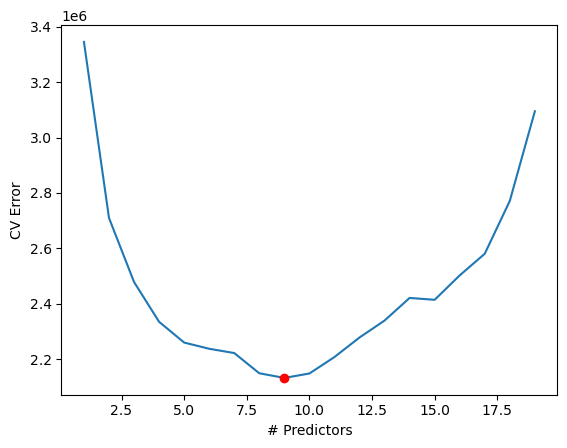

In [59]:
cv_mean = cv_errors.apply(np.mean, axis=1)

plt.plot(cv_mean)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.plot(cv_mean.argmin()+1, cv_mean.min(), "or")

We see that cross-validation selects a 9-predictor model. Now let's go back to our results on the full data set in order to obtain the 9-predictor model.

In [60]:
print(models_cv.loc[9, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.685
Model:                            OLS   Adj. R-squared (uncentered):              0.672
Method:                 Least Squares   F-statistic:                              54.56
Date:                Sun, 05 May 2024   Prob (F-statistic):                    8.32e-52
Time:                        17:11:35   Log-Likelihood:                         -1737.9
No. Observations:                 235   AIC:                                      3494.
Df Residuals:                     226   BIC:                                      3525.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

+ For comparison, let's also take a look at the statistics from last lab:

Text(0, 0.5, 'BIC')

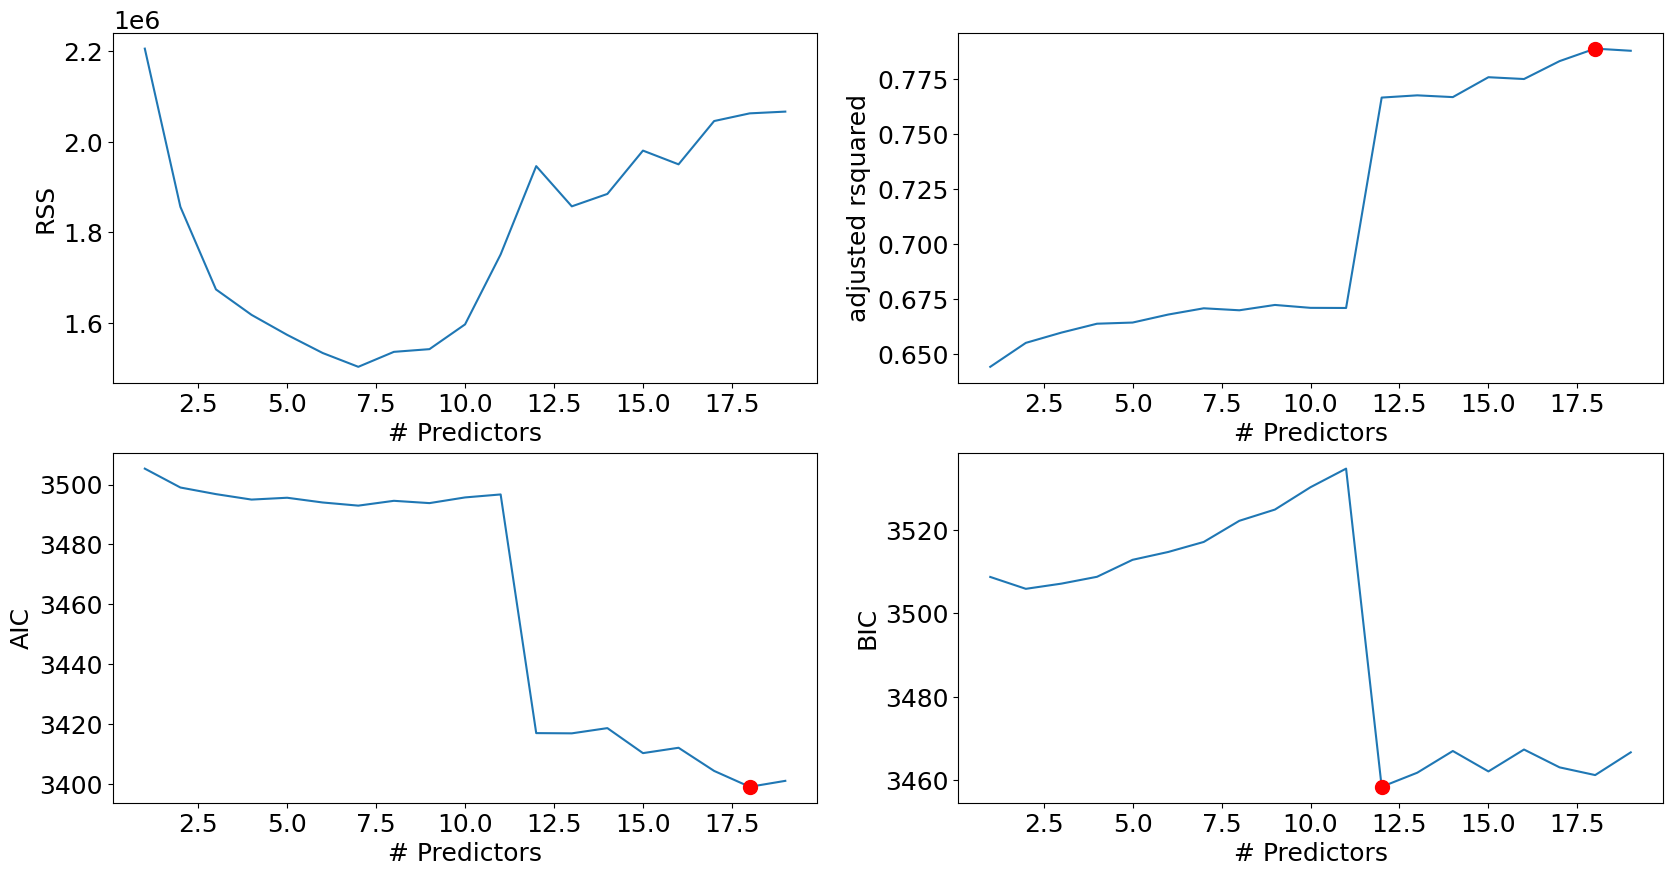

In [61]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_cv["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_cv.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax()+1, rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_cv.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin()+1, aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_cv.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin()+1, bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

+ Notice how some of the indicators are similar the cross-validated model, and others are very different?

### YOUR TURN
Use any dataset from this link
http://archive.ics.uci.edu/ml/datasets.html?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table

# Shrinkage Methods 
+ Fit a model containing all $p$ predictors.
+ The coefficients estimates are constrains or regularizes, which shrink its towards zero.
+ It wil reduce the variance, but does not guarantee it will improve the fit.
+ Ridge and Lasso regression are most common.

### Ridge Regression 岭回归

+ The least squares fitting procedure estimates $\beta_0, \beta_1, \ldots, \beta_p$ using the values that minimize
$$\textrm{RSS} = \sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2}$$
+ Ridge regression minimizes 
$$\sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} + \lambda \sum_{j=1}^p{\beta_j^2} = \textrm{RSS} + \lambda \sum_{j=1}^p{\beta_j^2}$$
where $\lambda \geq 0$ is a tuning parameter.
+ The shrinkage penalty, $\lambda \sum_{j=1}^p{\beta_j^2}$, is small when $\beta_1, \ldots, \beta_p$ are close to zero.
+ The tuning parameter $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates.
+ When $\lambda=0$ then ridge equals least squares. When $\lambda \rightarrow \infty$, all predictors head to 0.
+ Ridge regression produce  a different set of coefficient estimates, $\hat{\beta}_\lambda^R$, for each value of $\lambda$.
+ Since ridge regression works directly with the size of the parameter coefficients, you must scale all predictors by dividing by their standard deviation.
$$\tilde{x}_{ij}=\frac{x_{ij}}{\sqrt{\frac{1}{n}\sum_{i=1}^n{\left( x_{ij} - \bar{x}_j \right)^2}}}$$


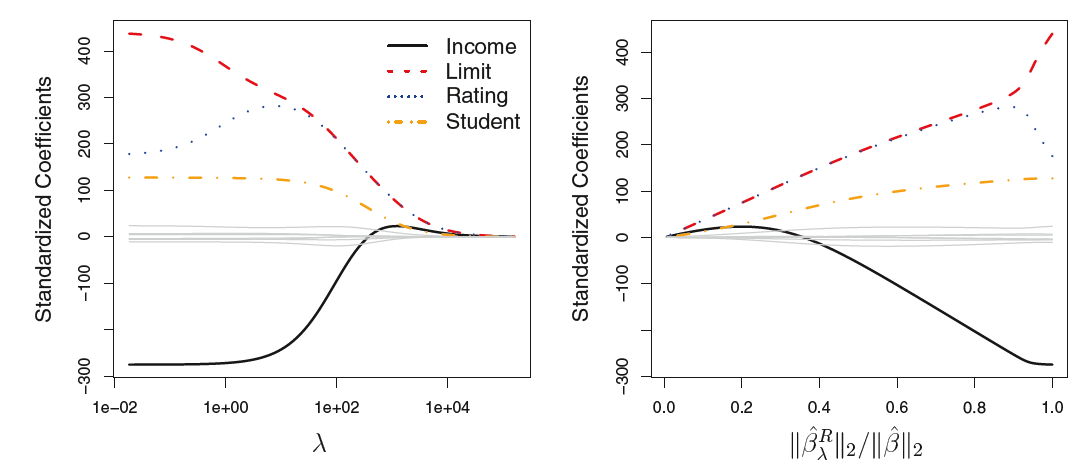

In [1]:
from IPython.display import Image
Image('D:/ukm.ppt/机器学习/week4/images/pw46.png', width =700)

$\ell_2$ norm, $\left\Vert \beta \right\Vert_2 = \sqrt{\sum_{j=1}^p{\beta_j^2}}$

#### Example

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

+ We will use the `sklearn` package in order to perform ridge regression and the lasso. 
+ The main functions in this package that we care about are `Ridge()`, which can be used to fit ridge regression models, and `Lasso()` which will fit lasso models. 
+ They also have cross-validated counterparts交叉验证: `RidgeCV()` and `LassoCV()`. We'll use these a bit later.

Before we proceed, let's first ensure that the missing values have
been removed from the data, as described in the previous lab.

In [3]:
df = pd.read_csv('D:/ukm.ppt/机器学习/week2/data/hitters.csv').dropna().drop('Unnamed: 0', axis = 1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

We will now perform ridge regression and the lasso in order to predict `Salary` on
the `Hitters` data. Let's set up our data:

In [4]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    bool   
 17  Division_W   263 non-null    bool   
 18  NewLeague_N  263 non-null    bool   
dtypes: bool(3), f

+ The `Ridge()` function has an alpha argument ($\lambda$, but with a different name!) that is used to tune the model.
+ We'll generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [5]:
alphas = 10**np.linspace(10,-2,100)*0.5
# 包含了用于岭回归或套索回归中的正则化参数（λ，即 lambda
# np.linspace 是 NumPy 库中的一个函数，用来生成在指定区间内均匀分布的数值。
# 生成了一个包含 100 个数的数组，这些数从 10 线性递减到 -2。
# 将 10 作为底数对 np.linspace 生成的每个元素进行幂运算。
alphas


array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

+ Associated with each alpha value is a vector of ridge regression coefficients, which we'll store in a matrix `coefs`. 
+ In this case, it is a $19 \times 100$ matrix, with 19 rows (one for each predictor) and 100 columns (one for each value of alpha). 
+ Remember that we'll want to standardize the variables so that they are on the same scale. To do this, we can use the `StandardScaler()` function:

In [6]:
# 使用岭回归对一组数据进行多个不同正则化强度的拟合，并且探索正则化强度如何影响模型系数的变化。
ridge = Ridge() # 岭回归模型
coefs = [] # 存储每个不同 alpha 参数下的岭回归模型系数。

scaler = StandardScaler() # StandardScaler 对特征数据 X 进行标准化处理。
X_scaled = scaler.fit_transform(X) # 将所有特征缩放到具有零均值和单位方差,确保了所有特征在正则化过程中被公平对待。

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 19)

We expect the coefficient estimates to be much smaller, in terms of $l_2$ norm,
when a large value of alpha is used, as compared to when a small value of alpha is
used. 

Let's plot and find out:

Text(0, 0.5, 'weights')

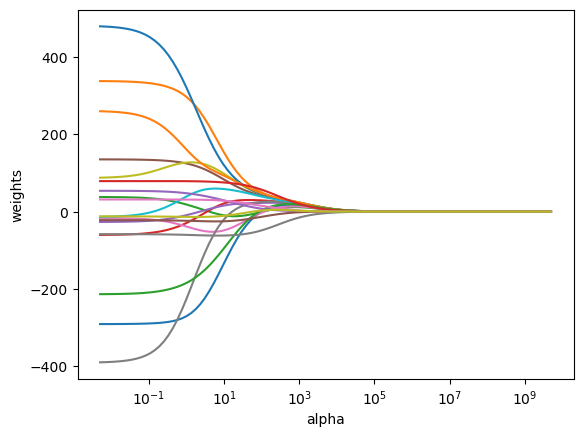

In [7]:
ax = plt.gca() # plt.gca() 获取当前活动的轴（Axes），如果没有则创建一个新的轴。
ax.plot(alphas, coefs)
ax.set_xscale('log') # ax.set_xscale('log') 设置 x 轴的缩放为对数缩放。
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

We now split the samples into a training set and a test set in order
to estimate the test error of ridge regression

In [8]:
# Split data into training and test sets 估计岭回归的测试误差
X_train, X_test , y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=1)

Fit a ridge regression model on the training set, and evaluate its MSE on the test set, using  $\lambda=4$ :

In [9]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

AtBat         -213.176543
Hits           191.133532
HmRun          -54.236259
Runs             0.497409
RBI             77.755957
Walks           89.751563
Years          -27.347561
CAtBat        -120.436464
CHits           89.341261
CHmRun          83.888337
CRuns           98.317502
CRBI           116.286711
CWalks         -40.517948
PutOuts        117.412662
Assists         26.509603
Errors         -19.132449
League_N        36.016247
Division_W     -60.417909
NewLeague_N    -18.714889
dtype: float64
102375.70769613977


In [11]:
ridge2 = Ridge(alpha = 0)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_train)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_train, pred2))          # Calculate the test MSE

AtBat          -267.752871
Hits            191.830073
HmRun           -41.721641
Runs             -0.988044
RBI             102.935440
Walks            75.220967
Years            45.444252
CAtBat        -1381.044044
CHits          1407.138021
CHmRun          244.425704
CRuns            88.048881
CRBI           -193.153012
CWalks           45.168467
PutOuts         117.645848
Assists          67.244233
Errors          -39.726067
League_N         66.762729
Division_W      -56.861659
NewLeague_N     -40.856844
dtype: float64
90466.25131773912


In [12]:
## Let alpha=10^10
ridge3 = Ridge(alpha = 10**10)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

AtBat          2.514813e-06
Hits           2.912660e-06
HmRun          1.986276e-06
Runs           2.685289e-06
RBI            3.189361e-06
Walks          3.118248e-06
Years          2.473459e-06
CAtBat         3.257461e-06
CHits          3.480687e-06
CHmRun         3.711503e-06
CRuns          3.474689e-06
CRBI           3.938490e-06
CWalks         3.029160e-06
PutOuts        3.055508e-06
Assists       -4.753637e-08
Errors         1.674891e-07
League_N      -1.638619e-07
Division_W    -1.015342e-06
NewLeague_N   -1.328587e-07
dtype: float64
172862.22014055075


+ This big penalty shrinks the coefficients to a very large degree, essentially reducing to a model containing just the intercept.
+ This over-shrinking makes the model more biased, resulting in a higher MSE.
+ now check whether there is any benefit to performing ridge regression with alpha = 4 instead of just performing least squares regression. 
+ Recall that least squares is simply ridge regression with alpha = 0.

In [13]:
### The least squares, alpha = 0
ridge2 = Ridge(alpha = 0)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

AtBat          -267.752871
Hits            191.830073
HmRun           -41.721641
Runs             -0.988044
RBI             102.935440
Walks            75.220967
Years            45.444252
CAtBat        -1381.044044
CHits          1407.138021
CHmRun          244.425704
CRuns            88.048881
CRBI           -193.153012
CWalks           45.168467
PutOuts         117.645848
Assists          67.244233
Errors          -39.726067
League_N         66.762729
Division_W      -56.861659
NewLeague_N     -40.856844
dtype: float64
116690.468566634


+ It looks like we are indeed improving over regular least-squares!

+ Instead of arbitrarily choosing alpha $ = 4$, it would be better to use cross-validation to choose the tuning parameter alpha. 
+ We can do this using the cross-validated ridge regression function, `RidgeCV()`. 
+ By default, the function performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the argument `cv`.

In [14]:
###  use cross-validation to choose the tuning parameter alpha. 使用交叉验证选择调优参数alpha。
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error') # RidgeCV 是带有内置交叉验证的岭回归模型。
# 'neg_mean_squared_error'，意味着在交叉验证过程中使用负均方误差作为性能评价标准。
ridgecv.fit(X_train, y_train)
ridgecv.alpha_ # alpha_ 属性存储了交叉验证确定的最优 alpha 值

87.37642000038414

Therefore, we see that the value of alpha that results in the smallest cross-validation
error is 87.37. 

What is the test MSE associated with this value of
alpha?

In [15]:
###Fit to the test data
ridge4 = Ridge(alpha = ridgecv.alpha_)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

100041.00144659569

This represents a further improvement over the test MSE that we got using
alpha $ = 4$. 

Finally, we refit our ridge regression model on the full data set,
using the value of alpha chosen by cross-validation, and examine the coefficient
estimates.

In [16]:
###Fit to the whole data
ridge4.fit(X_scaled, y)

print(pd.Series(ridge4.coef_, index = X.columns))

AtBat          -3.523031
Hits           52.317273
HmRun          -2.229998
Runs           29.166801
RBI            22.313457
Walks          42.608761
Years          -5.214714
CAtBat         24.399636
CHits          46.574450
CHmRun         40.154375
CRuns          47.179284
CRBI           49.378118
CWalks          0.430680
PutOuts        58.565659
Assists         8.184012
Errors        -14.476788
League_N       15.731040
Division_W    -50.182047
NewLeague_N     2.213752
dtype: float64


### The Lasso 。
+ Least absolute shrinkage and selection operator
+ Ridge regression will include all $p$ predictors in the final model since it will only shrink the coefficients towards zero, not exactly zero. Therefore, if $p$ is large, then the model is hard to be interpreted.
+ Lasso can overcome this problem.
$$\sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} + \lambda \sum_{j=1}^p{\left|\beta_j\right|} = \textrm{RSS} + \lambda \sum_{j=1}^p{\left|\beta_j\right|}$$

+ Lasso uses $\ell_1$ penalty instead of $\ell_2$ (absolute value of predictors vs squared value). 
+ $\ell_1$ norm, $\left\Vert \beta \right\Vert_1 = \sum{\left| \beta_j \right|}$.
+ The lasso performs variable selection by setting some predictors to exactly 0 (and thus automatic variable selection), unlike ridge which will never completely do eliminate variables. 
+ The lasso yields sparse models — models that involve only a subset of the variables.



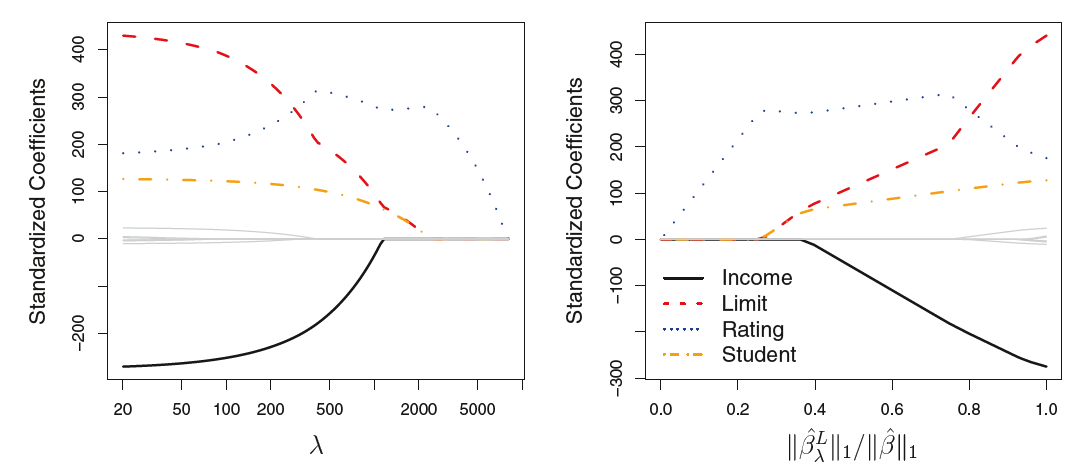

In [20]:
Image('D:/ukm.ppt/机器学习/week4/images/pw47.png', width =700)

#### Example: 
+ we saw that ridge regression with a wise choice of alpha can outperform least squares as well as the null model on the Hitters data set. 
+ We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression. 
+ In order to fit a lasso model, we'll use the `Lasso()` function; however, this time we'll need to include the argument `max_iter = 10000`.
+ Other than that change, we proceed just as we did in fitting a ridge model:

In [ ]:
lasso = Lasso(max_iter = 10000) # max_iter = 10000 设置算法的最大迭代次数，
# 这个参数确保算法有足够的迭代次数来收敛，尤其是在处理更复杂或计算更密集的数据集时。
coefs = []
scaler = StandardScaler()
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scaler.transform(X_train), y_train) 
    # scaler.transform(X_train) 将训练数据 X_train 进行标准化处理。
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

+ Notice that in the coefficient plot that depending on the choice of tuning parameter, some of the coefficients are exactly equal to zero. 
+ We now perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

In [25]:
## Perform 10-fold cross-validation to choose the best alpha.10折交叉验证

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
# alphas = None 表示 LassoCV 将自动计算一系列 alphas 来使用，你也可以提供自定义的 alphas 数组。
# cv = 10 指定交叉验证的折数为 10
# max_iter = 100000 设置最大迭代次数，确保算法有足够的迭代来收敛
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_) # 从 LassoCV 获取的最佳 alpha 值来设置 Lasso 模型的 alpha 参数。
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

105121.06327904538

In [28]:
lassocv.alpha_

28.038544563299848

In [30]:
mean_squared_error(y_train, lasso.predict(X_train))

111484.74006204921

This is substantially lower than the test set MSE of the null model and of least squares, and only a little worse than the test MSE of ridge regression with alpha chosen by cross-validation.

However, lasso has a substantial advantage over ridge regression in
that the resulting coefficient estimates are sparse. Here we see that 13 of
the 19 coefficient estimates are exactly zero:

In [26]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

AtBat            0.000000
Hits            47.417582
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks           64.015661
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun          16.243847
CRuns            0.000000
CRBI           168.983385
CWalks           0.000000
PutOuts        104.196395
Assists         -0.000000
Errors          -0.000000
League_N         0.000000
Division_W     -43.965512
NewLeague_N      0.000000
dtype: float64

### Alternative logic of lasso and ridge regression
+ Instead of thinking of penalizing the error by either the $\ell_1$ or $\ell_2$ norm, we can think of setting up lasso/ridge regression as minimizing the squared errors subject to keeping the parameters less than a certain value. 
+ Think of this value as a 'budget', $s$, of allowable spending to occur. You can allow yourself to spend your parameters in any way you chose as long as you don't go over the total budget.
+ For Lasso
$$\displaystyle \min_{\beta}\left\{ \sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} \right\} \quad \textrm{subject to} \quad \sum_{j=1}^p{\left|\beta_j\right|} \leq s$$
and for ridge regression
$$\displaystyle \min_{\beta}\left\{ \sum_{i=1}^n{\left( y_i - \beta_0 - \sum_{j=1}^p{\beta_j x_{ij}} \right)^2} \right\} \quad \textrm{subject to} \quad \sum_{j=1}^p{\beta^2_j} \leq s$$

+ Lasso yields predictors equivalent to 0 because of sharp corners


![ridge and lasso](images/ridge.png)

### Which is better Lasso or Ridge 
+ In general, when there are many important predictor variables that related to the response, ridge will perform better. 
+ When there are only a few variables that relate to the response, lasso will do better.
+ However, cross validation can be used to determine this.

### Choosing $\lambda$
Choose $\lambda$ through cross validation. Search an array of $\lambda$'s through cross validation and choose the $\lambda$ which minimizes MSE. Then build your model with that $\lambda$ on all the data.


# Your turn!

1. Now it's time to test out these approaches (ridge regression and the lasso) and evaluation methods (validation set, cross validation) on other datasets. 
2. You may want to work with a team on this portion of the lab.
3. You may use any of the datasets from the UCI machine learning repository (http://archive.ics.uci.edu/ml/datasets.html). 
4. Download a dataset, and try to determine the optimal set of parameters to use to model it! You are free to use the same dataset you have used previously.